# predictTrajectory

*note: x is left right y is forward backward z is up down*

alr we have the true goal pos now<br>
we could just hardcode the motor power and just shoot from a few specific spots (what were doing rn)<br>
but it would be great if we had the flexibility to shoot from anywhere yk<br>
we could just do basic calibration and ballistics<br>
but we also wanna be able to shoot while moving and do trickshots and other cool stuff<br>
therefore we have to do more complex fIzZiX with linear acceleration, angular velocity, womp womp

small problem: i dont know how to fIzZiX FOR SHIT. i can just do fun math and code. victuna can do fIzZiX and fun math but he cant code FOR SHIT. ts skill distribution 😭<br>
if youre reading this youre along for the entire journey of ts

in `projectGoal`, we calculated the true XYZ target coords for the goal, relative to the extake as the origin. $T_0=(T_x,T_y,T_z)$ represents the initial position of the target. $v_r=(v_x,v_y,v_z)$ represents the linear velocity of the robot through the IMU (excluding gravity). therefore, given time, the effective target position we should be aiming at can be defined as $T(t)=T_0-v_rt$. assume that, given time, $P(t)$ represents the position of the projectile. therefore, we want to find for what time is $T(t)=P(t)$ true. how we calculate the projectile position given time will vary from shooter to shooter and shooter design to shooter design. we can only shoot at a fixed angle, at a variable velocity $v_{0}$. therefore, let us call the elevation $\theta$ and the azimuth (bearing) $\phi$. we set $g=9.81m/s$. because `projectGoal` sets the extake as the origin, we don't have to calculate any offsets. the trajectory, as a function of time in 3D space, would be:
$$X(t)=v_{0}t\cdot\cos(\theta)\sin(\phi)$$
$$Y(t)=v_0t \cdot\cos(\theta)\cos(\phi)$$
$$Z(t)=v_{0}t\cdot\sin(\theta)-0.5gt^{2}$$
therefore, for any time, the corresponding point is $\left(X\left(t\right),Y\left(t\right),Z\left(t\right)\right)$. given $v_0$, $\theta$, and $\phi$, we can predict the trajectory of the projectile over time, in 3D space. rn idk what the extake angle is, so lets just set $\theta=67^{\circ}$ <sup>6</sup>🤷<sup>7</sup>. we can calculate:
$$\phi=\arctan_2(T_{x},T_{y})$$
$$T_{R}=\sqrt{T_{x}^{2}+T_{y}^{2}}$$
$$t=\frac{T_{R}}{v_{0}\cdot\cos\left(\theta\right)}$$
<details>
    <summary>and we substitute into $Z(t)$</summary>
    
> &nbsp;
    $$T_{z} = T_{R}\tan\left(\theta\right) - \frac{gT_{R}^{2}}{2v_{0}^{2}\cos^{2}\left(\theta\right)}$$

> rearrange
    $$T_{R}\tan\left(\theta\right) - T_{z} = \frac{gT_{R}^{2}}{2v_{0}^{2}\cos^{2}\left(\theta\right)}$$

> isolate $v_{0}^{2}$
    $$v_{0}^{2} = \frac{gT_{R}^{2}}{2\cos^{2}\left(\theta\right)\left(T_{R}\tan\left(\theta\right)-T_{z}\right)}$$

> and we get
</details>
$$v_0=\sqrt{\frac{gT_{R}^{2}}{2\cos^{2}\left(\theta\right)\left(T_{R}\tan\left(\theta\right)-T_{z}\right)}}$$
and we confirm
$$(T_x,T_y,T_z)=\left(X\left(\frac{T_{R}}{v_{0}\cdot\cos\left(\theta\right)}\right),Y\left(\frac{T_{R}}{v_{0}\cdot\cos\left(\theta\right)}\right),Z\left(\frac{T_{R}}{v_{0}\cdot\cos\left(\theta\right)}\right)\right)$$
<details>
    <summary>then we simplify</summary>
    
> start with the equation for $t$
    $$t=\frac{T_{R}}{v_0\cdot\cos\left(\theta\right)}$$

> find the reciprocal of $v_0$
    $$\frac{1}{v_0}=\sqrt{\frac{2\cos^{2}\left(\theta\right)\left(T_{R}\tan\left(\theta\right)-T_{z}\right)}{gT_{R}^{2}}}$$

> substitute $\frac{1}{v_0}$ back into the equation for $t$
    $$t=\left(\frac{T_{R}}{\cos\left(\theta\right)}\right) \cdot \sqrt{\frac{2\cos^{2}\left(\theta\right)\left(T_{R}\tan\left(\theta\right)-T_{z}\right)}{gT_{R}^{2}}}$$

> bring the outer term inside the square root by squaring it
    $$t=\sqrt{\left(\frac{T_{R}}{\cos\left(\theta\right)}\right)^2 \cdot \frac{2\cos^{2}\left(\theta\right)\left(T_{R}\tan\left(\theta\right)-T_{z}\right)}{gT_{R}^{2}}}$$

> distribute the square on the first term
    $$t=\sqrt{\left(\frac{T_{R}^2}{\cos^2\left(\theta\right)}\right) \cdot \frac{2\cos^{2}\left(\theta\right)\left(T_{R}\tan\left(\theta\right)-T_{z}\right)}{gT_{R}^{2}}}$$

> cancel the $cos^{2}(\theta)$ terms
    $$t=\sqrt{\frac{T_{R}^2 \cdot 2\left(T_{R}\tan\left(\theta\right)-T_{z}\right)}{gT_{R}^{2}}}$$

> cancel the $T_R^{2}$ terms
    $$t=\sqrt{\frac{2\left(T_{R}\tan\left(\theta\right)-T_{z}\right)}{g}}$$

> finally we get
</details>
$$t=\sqrt{\frac{2\left(\sqrt{T_{x}^{2}+T_{y}^{2}}\tan\left(\theta\right)-T_{z}\right)}{g}}$$
<details>
    <summary>sometimes theres no solution</summary>
    
> when
    $$\sqrt{T_{x}^{2}+T_{y}^{2}}\tan\left(a\right)-T_{z}\gt0$$
> because its simply too high for your extake angle to reach
> keep in mind if
    $$\sqrt{T_{x}^{2}+T_{y}^{2}}\tan\left(a\right)-T_{z}=0$$
> $v_0$ is basically infinite or smth idk not tryna math that out rn
> but yeah check if ts is positive but also check if $v_0$ is realistic before lockheed martin comes banging on your door
</details><br>
now, heres ts problem: recall the equality $T(t)=P(t)$. the left side $T(t)=T_0-v_rt$ relies on time to get the position. however, we need the position, to get the velocity, to get the time. this morphs into a circular dependency chain, making the problem unsolveable through traditional methods. therefore, we have to solve it iteratively through basically guess and check but sigma. the iterative process will look something like this:

- calculate $t_1$ with $t_0=0$
- calculate $t_2$ with $t_1$
- calculate $t_3$ with $t_2$
- ...
- stop when $t_{n+1}$ and $t_{n}$ are pretty close to each other
- $t=t_{n+1}$
- calculate $v_0$ and $\phi$
- done

about now i realize that strategically there is small gain here because most of the time will not be in a launch zone but i already started so like womp womp

In [47]:
import numpy as np

G = 9.80665
THETA = np.radians(67)
MAX_ITERATIONS = 67
EPSILON = 1e-4

def calculate_trajectory(Tx, Ty, Tz, vx, vy, vz):
    t = 0.0
    
    for i in range(MAX_ITERATIONS):
        dx = Tx - vx * t
        dy = Ty - vy * t
        dz = Tz - vz * t
        TR = np.hypot(dx, dy)
        
        discriminant = TR * np.tan(THETA) - dz
        if discriminant < 0:
            print(f"warning: target unreachable at iteration {i}")
            return None
            
        t_next = np.sqrt(2 * discriminant / G)
        print(f"iteration {i}: t={t_next} s")
        
        if np.abs(t_next - t) < EPSILON:
            t = t_next
            break
        t = t_next
    else:
        print("warning: solver did not converge")

    # final trajectory parameters
    dx = Tx - vx * t
    dy = Ty - vy * t
    TR = np.hypot(dx, dy)
    
    v0 = TR / (t * np.cos(THETA))
    phi = np.arctan2(dx, dy)
    
    return {
        "velocity": v0,
        "bearing": np.degrees(phi),
        "time": t
    }

In [48]:
print(f"result (static): {calculate_trajectory(3.0, 4.0, 5.0, 0.0, 0.0, 0.0)}")
print(f"result (moving): {calculate_trajectory(3.0, 4.0, 5.0, 0.6, 0.7, 0.0)}")

iteration 0: t=1.175833593598585 s
iteration 1: t=1.175833593598585 s
result (static): {'velocity': np.float64(10.882937344113538), 'bearing': np.float64(36.86989764584402), 'time': np.float64(1.175833593598585)}
iteration 0: t=1.175833593598585 s
iteration 1: t=0.9290553619247157 s
iteration 2: t=0.9859515909668911 s
iteration 3: t=0.9731271244685917 s
iteration 4: t=0.9760323923451776 s
iteration 5: t=0.9753749834786182 s
iteration 6: t=0.9755237816002248 s
iteration 7: t=0.9754901045635083 s
result (moving): {'velocity': np.float64(10.764580272616605), 'bearing': np.float64(36.05253741891542), 'time': np.float64(0.9754901045635083)}


iteration 0: t=1.175833593598585 s
iteration 1: t=0.6103104978499896 s
iteration 2: t=0.9053444171361575 s
iteration 3: t=0.757075653298959 s
iteration 4: t=0.8331507351182813 s
iteration 5: t=0.7945162664202492 s
iteration 6: t=0.8142414534985619 s
iteration 7: t=0.8041976587725703 s
iteration 8: t=0.8093188757409517 s
iteration 9: t=0.8067094551461922 s
iteration 10: t=0.8080395123746335 s
iteration 11: t=0.8073616875823734 s
iteration 12: t=0.8077071532606274 s
iteration 13: t=0.8075310887554894 s
iteration 14: t=0.807620821136133 s
result: {'velocity': np.float64(11.027212946359763), 'bearing': np.float64(23.449753913357338), 'time': np.float64(0.807620821136133)}


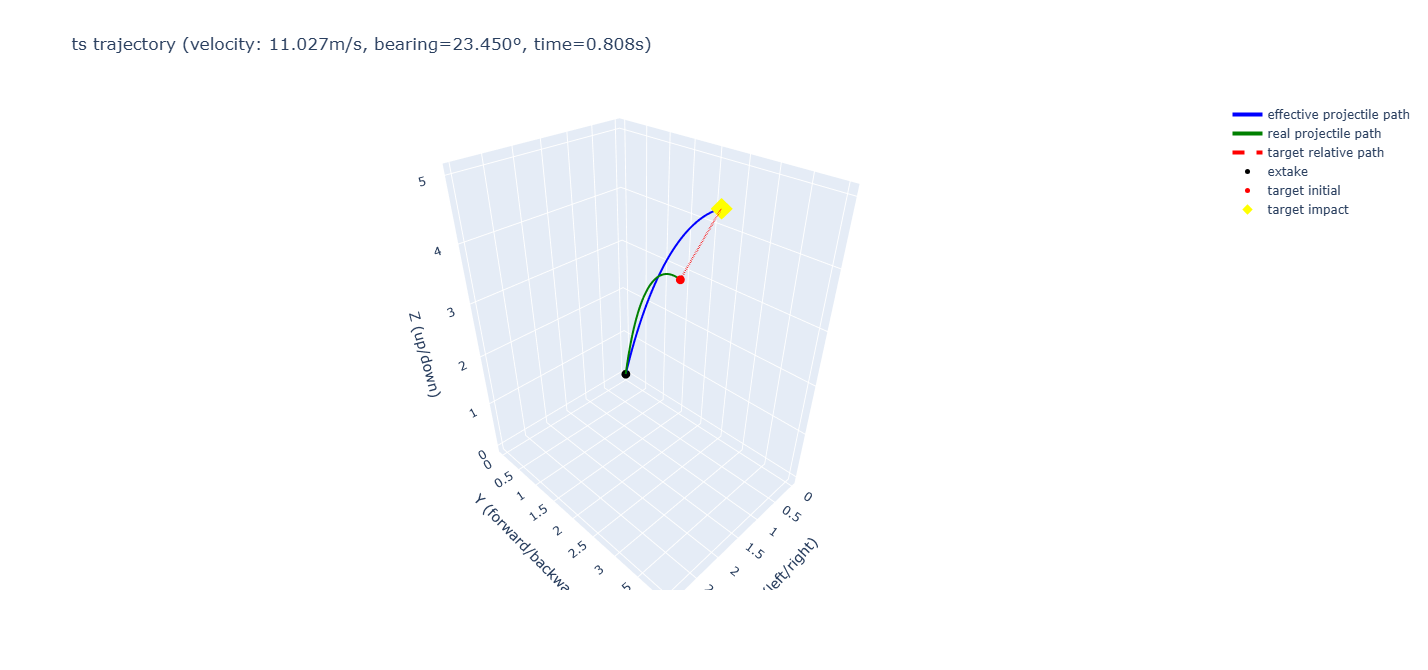

In [51]:
import plotly.graph_objects as go

def visualize_trajectory(Tx, Ty, Tz, vx, vy, vz):
    result = calculate_trajectory(Tx, Ty, Tz, vx, vy, vz)
    
    if result is None:
        print("no solution were cooked")
        return
    
    print(f"result: {result}")
    
    v0 = result["velocity"]
    phi = np.radians(result["bearing"])
    t_final = result["time"]

    t = np.linspace(0, t_final, 67)

    Px = v0 * t * np.cos(THETA) * np.sin(phi)
    Py = v0 * t * np.cos(THETA) * np.cos(phi)
    Pz = v0 * t * np.sin(THETA) - 0.5 * G * t**2

    Tx_t = Tx - vx * t
    Ty_t = Ty - vy * t
    Tz_t = Tz - vz * t

    Rx = Px + vx * t
    Ry = Py + vy * t
    Rz = Pz + vz * t

    # visualize
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter3d(
        x=Px, y=Py, z=Pz,
        mode="lines", name="projectile effective path",
        line=dict(color="blue", width=4)
    ))

    fig.add_trace(go.Scatter3d(
        x=Rx, y=Ry, z=Rz,
        mode="lines", name="projectile real path",
        line=dict(color="green", width=4)
    ))
    
    fig.add_trace(go.Scatter3d(
        x=Tx_t, y=Ty_t, z=Tz_t,
        mode="lines", name="target relative path",
        line=dict(color="red", width=4, dash="dash")
    ))
    
    fig.add_trace(go.Scatter3d(
        x=[0], y=[0], z=[0],
        mode="markers", name="extake",
        marker=dict(size=5, color="black")
    ))
    
    fig.add_trace(go.Scatter3d(
        x=[Tx], y=[Ty], z=[Tz],
        mode="markers", name="target initial",
        marker=dict(size=5, color="red")
    ))
    
    fig.add_trace(go.Scatter3d(
        x=[Px[-1]], y=[Py[-1]], z=[Pz[-1]],
        mode="markers", name="target effective impact",
        marker=dict(size=8, color="yellow", symbol="diamond")
    ))

    fig.update_layout(
        title=f"ts trajectory (velocity: {v0:.3f}m/s, bearing={np.degrees(phi):.3f}°, time={t_final:.3f}s)",
        scene=dict(
            xaxis_title="X (left/right)",
            yaxis_title="Y (forward/backward)",
            zaxis_title="Z (up/down)",
            aspectmode="data"
        ),
        height=670
    )
    
    fig.show()

visualize_trajectory(3.0, 4.0, 5.0, 2.0, 1.0, 0.0)

alr ts math is mathing<br>
its just that sometimes the trajectory that the artifact takes will result in it running into the goal instead of going through the top<br>
not tryna do that math tonight